## Objective
 The goal of this lab is to perform exploratory df analysis using statistical techniques
 to understand the characteristics, distribution, and relationships in NYC yellow taxi trip
 data. You will compute descriptive statistics, visualize df patterns, and apply inferential
 statistics to draw conclusions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.stats import pearsonr, spearmanr

In [2]:
df=pd.read_csv('yellow_tripdata_sample.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


## dfset Description
The dfset contains trip-level df of yellow taxi rides in NYC. Each record includes attributes
such as pickup/dropoff time, trip distance, fare amount, passenger count, payment
type, and more. Refer to the attached df dictionary for field definitions.

In [3]:
df.shape

(995, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

In [5]:
# here date tpep_pickup_datetime and tpep_dropoff_datetime are objects and we need to convert them to datetime format

In [6]:
df.nunique()
# check for unique values of all columns

VendorID                   2
tpep_pickup_datetime     861
tpep_dropoff_datetime    892
passenger_count            7
trip_distance            444
RatecodeID                 5
store_and_fwd_flag         2
PULocationID              66
DOLocationID             114
payment_type               3
fare_amount               95
extra                      9
mta_tax                    3
tip_amount               237
tolls_amount               4
improvement_surcharge      3
total_amount             423
congestion_surcharge       3
Airport_fee                3
dtype: int64

In [7]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [23]:
# here we can that there is no missing value in the dataset

In [8]:
df.describe()
# statistical summary of the dataset

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.703518,1.581910,2.890472,1.138693,165.323618,163.204020,1.228141,18.278593,1.741457,0.491960,3.483146,0.197357,0.988945,26.847538,2.326633,0.052764
std,0.456936,0.911625,3.125268,3.126260,67.808656,73.059288,0.486448,14.916422,1.255742,0.077276,4.195507,1.180907,0.144929,18.092018,0.673846,0.309523
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-47.800000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-52.800000,-2.500000,-1.750000
25%,1.000000,1.000000,1.125000,1.000000,114.000000,107.000000,1.000000,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,16.320000,2.500000,0.000000
50%,2.000000,1.000000,1.960000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,0.500000,3.000000,0.000000,1.000000,22.200000,2.500000,0.000000
75%,2.000000,2.000000,3.400000,1.000000,236.000000,236.000000,1.000000,22.600000,3.500000,0.500000,4.820000,0.000000,1.000000,31.770000,2.500000,0.000000
max,2.000000,6.000000,23.900000,99.000000,265.000000,265.000000,4.000000,180.000000,7.750000,0.500000,80.000000,12.750000,1.000000,217.200000,2.500000,1.750000


In [9]:
from scipy.stats import skew, kurtosis
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']

for col in columns:
    print(f"Statistics for {col}:")
    series = df[col]
    print(f"Mean: {series.mean()}")
    print(f"Median: {series.median()}")
    print(f"Mode: {series.mode()}")
    print(f"Count: {series.count()}")
    print(f"Missing: {series.isna().sum()}")
    print(f"Min: {series.min()}")
    print(f"Max: {series.max()}")
    print(f"Std: {series.std()}")
    print(f"Var: {series.var()}")

    skewness = skew(series.dropna())
    kurt = kurtosis(series.dropna())
    
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurt}")
    print("-" * 40)

Statistics for passenger_count:
Mean: 1.5819095477386935
Median: 1.0
Mode: 0    1.0
Name: passenger_count, dtype: float64
Count: 995
Missing: 0
Min: 0.0
Max: 6.0
Std: 0.9116253266978481
Var: 0.8310607362769583
Skewness: 1.6618197158714616
Kurtosis: 2.807675808432278
----------------------------------------
Statistics for trip_distance:
Mean: 2.8904723618090453
Median: 1.96
Mode: 0    0.9
1    1.1
Name: trip_distance, dtype: float64
Count: 995
Missing: 0
Min: 0.0
Max: 23.9
Std: 3.1252678079193874
Var: 9.767298871217253
Skewness: 3.2832131111044847
Kurtosis: 13.89941202708118
----------------------------------------
Statistics for fare_amount:
Mean: 18.27859296482412
Median: 14.2
Mode: 0    6.5
Name: fare_amount, dtype: float64
Count: 995
Missing: 0
Min: -47.8
Max: 180.0
Std: 14.916422223234415
Var: 222.49965194180155
Skewness: 3.007896975924954
Kurtosis: 20.629774556742067
----------------------------------------
Statistics for total_amount:
Mean: 26.84753768844221
Median: 22.2
Mode: 0 

In [10]:
print("analyzing passenger count statistics")

min_passenger_count = df['passenger_count'].min()
print("Minimum passenger count:", min_passenger_count)

max_passenger_count = df['passenger_count'].max()
print("Maximum passenger count:", max_passenger_count)

avg_passenger_count = df['passenger_count'].mean()
print("Average passenger count:", avg_passenger_count)

sd_passenger_count = df['passenger_count'].std()
print("Standard deviation of passenger count:", sd_passenger_count)

median_passenger_count = df['passenger_count'].median()
print("Median passenger count:", median_passenger_count)

mode_passenger_count = df['passenger_count'].mode()[0]
print("Mode passenger count:", mode_passenger_count)

variance_passenger_count = df['passenger_count'].var()
print("Variance passenger count:", variance_passenger_count)

analyzing passenger count statistics
Minimum passenger count: 0.0
Maximum passenger count: 6.0
Average passenger count: 1.5819095477386935
Standard deviation of passenger count: 0.9116253266978481
Median passenger count: 1.0
Mode passenger count: 1.0
Variance passenger count: 0.8310607362769583


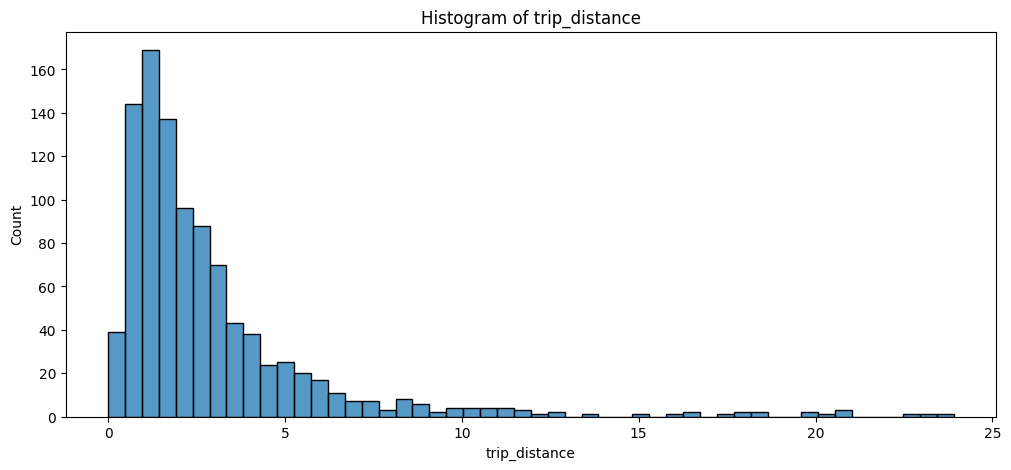

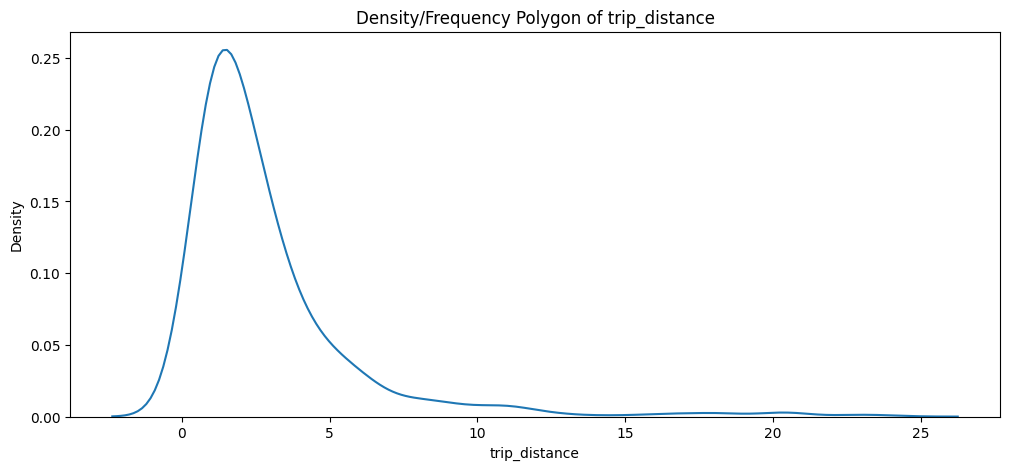

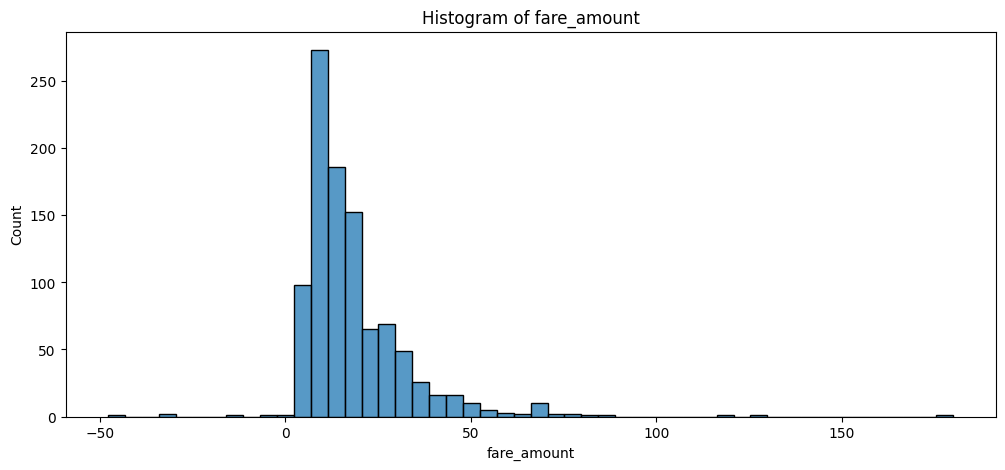

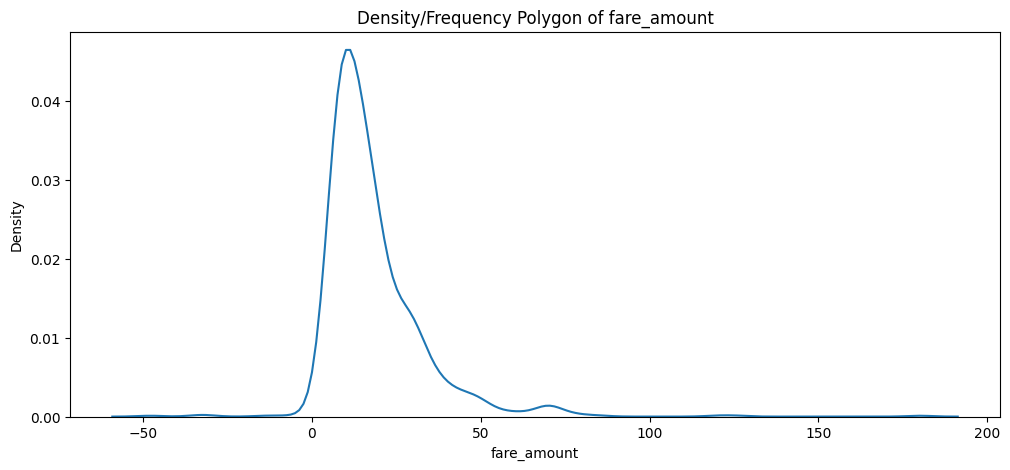

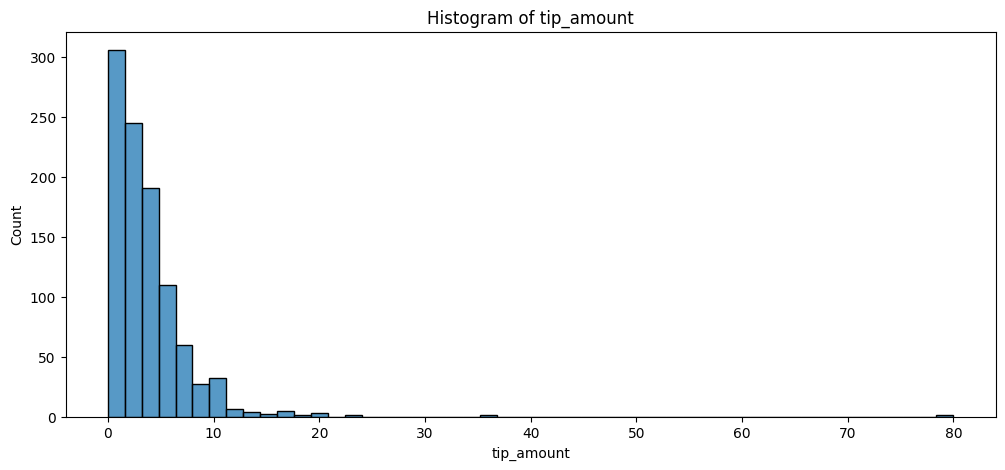

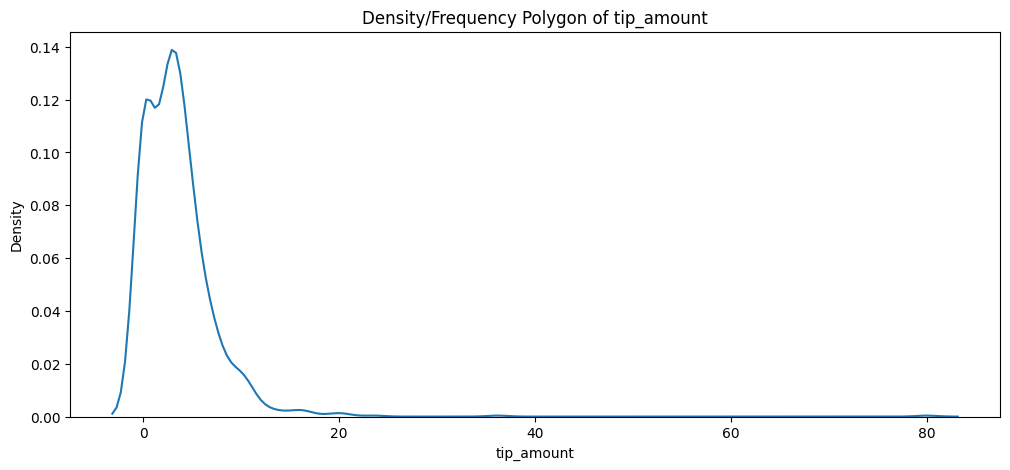

In [11]:
for col in ['trip_distance', 'fare_amount', 'tip_amount']:
    plt.figure(figsize=(12,5))
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f'Histogram of {col}')
    plt.show()
    
    plt.figure(figsize=(12,5))
    sns.kdeplot(df[col], cumulative=False)
    plt.title(f'Density/Frequency Polygon of {col}')
    plt.show()


Passenger count distribution:


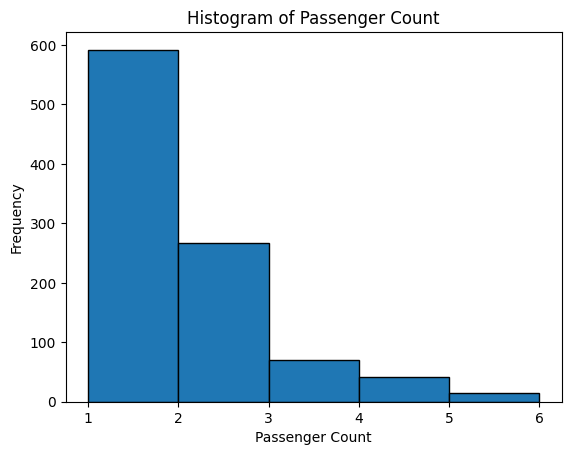

observations made
majorly there are more trips with 1-2 passengers
fewer trips with higher passenger counts
the average passenger count is around 1.5


In [12]:
plt.hist(df['passenger_count'], bins=range(1, 7), edgecolor='black')


print("Passenger count distribution:")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.title("Histogram of Passenger Count")
plt.show()

print("observations made")
print("majorly there are more trips with 1-2 passengers")
print("fewer trips with higher passenger counts")
print("the average passenger count is around 1.5")


observations

Clear peak at 1 passenger — Most trips are single-passenger rides.
Secondary smaller peak at 2 passengers — Two-person trips are the next most frequent.
Passenger counts above 3 are much less common, with very few trips having 5 or more passengers.
The distribution is right-skewed, showing a rapid drop in frequency as passenger count increases.
A tiny spike at 0 passengers suggests possible data entry errors or special-case trips.



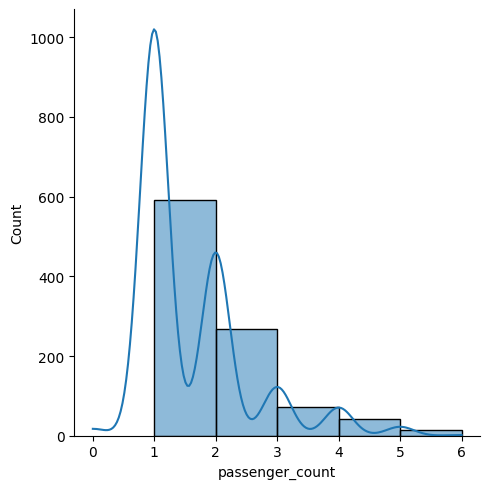

In [13]:
sns.displot(df['passenger_count'], bins=range(1, 7), kde=True)

print("observations")
print("""
Clear peak at 1 passenger — Most trips are single-passenger rides.
Secondary smaller peak at 2 passengers — Two-person trips are the next most frequent.
Passenger counts above 3 are much less common, with very few trips having 5 or more passengers.
The distribution is right-skewed, showing a rapid drop in frequency as passenger count increases.
A tiny spike at 0 passengers suggests possible data entry errors or special-case trips.
""")


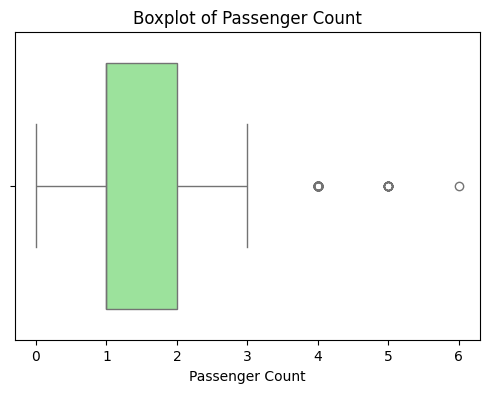

Observation from Boxplot:
- The median passenger count is 1.0, with most data points tightly clustered around it.
- Minimum passenger count observed: 0.0, Maximum: 6.0
- There are extreme outliers on the higher end, possibly due to group/shared rides.
- The boxplot shows a short upper whisker, meaning higher passenger counts are less frequent.



In [14]:
# Boxplot for passenger_count
plt.figure(figsize=(6,4))
sns.boxplot(x=df['passenger_count'], color='lightgreen')
plt.title('Boxplot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

# Detailed Observation
median_val = df['passenger_count'].median()
max_val = df['passenger_count'].max()
min_val = df['passenger_count'].min()
print("Observation from Boxplot:")
print(f"- The median passenger count is {median_val}, with most data points tightly clustered around it.")
print(f"- Minimum passenger count observed: {min_val}, Maximum: {max_val}")
if max_val > median_val + 3 * df['passenger_count'].std():
    print("- There are extreme outliers on the higher end, possibly due to group/shared rides.")
else:
    print("- Very few or no extreme outliers detected.")
print("- The boxplot shows a short upper whisker, meaning higher passenger counts are less frequent.\n")


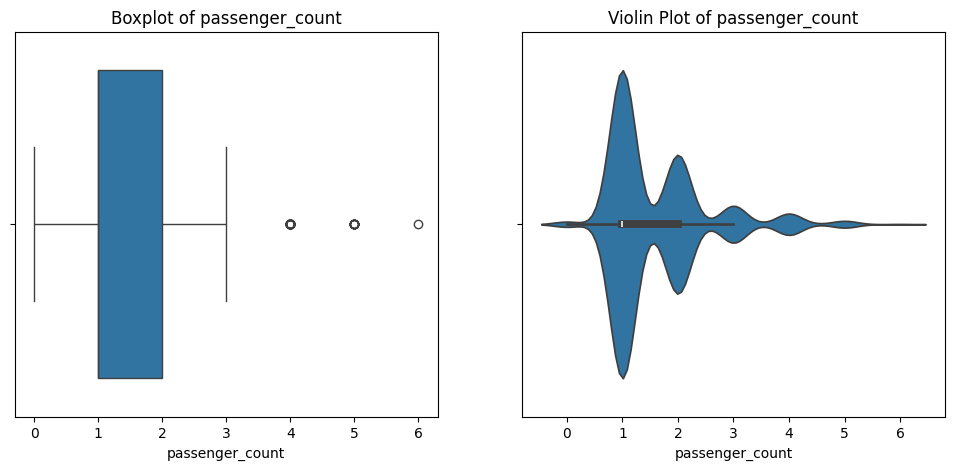

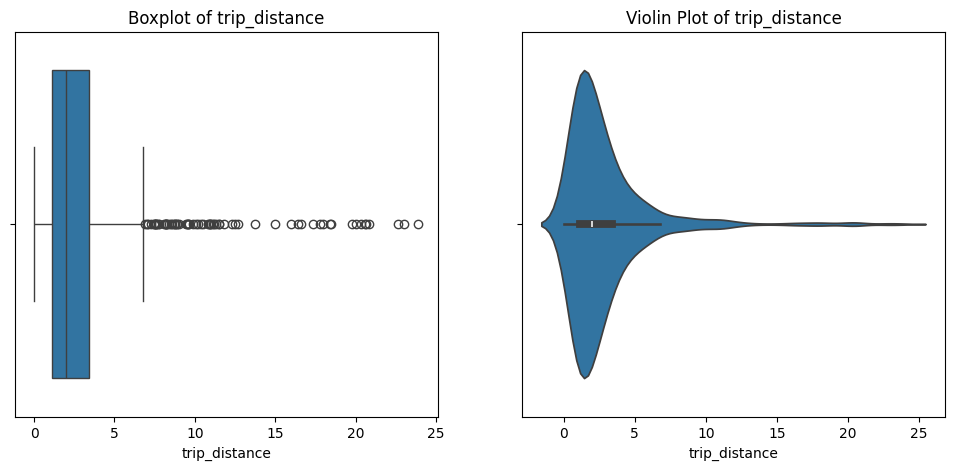

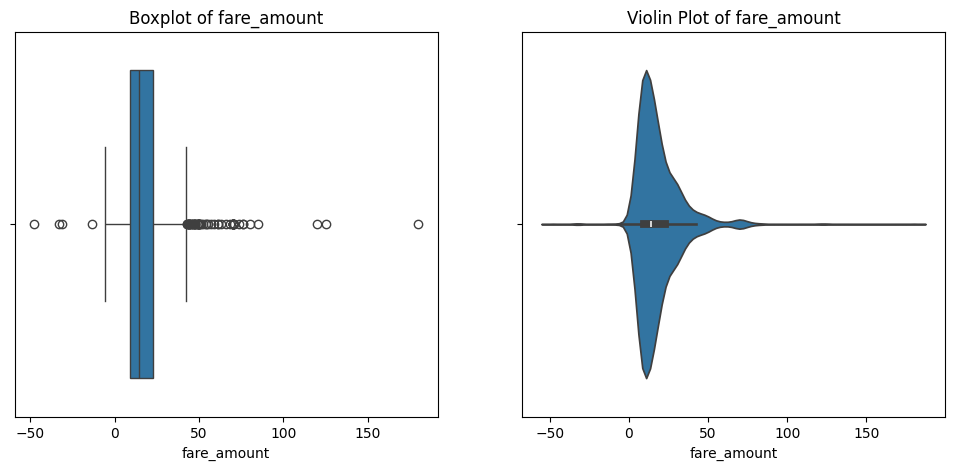

In [15]:
for col in ['passenger_count', 'trip_distance', 'fare_amount']:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.subplot(1,2,2)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
    
    plt.show()


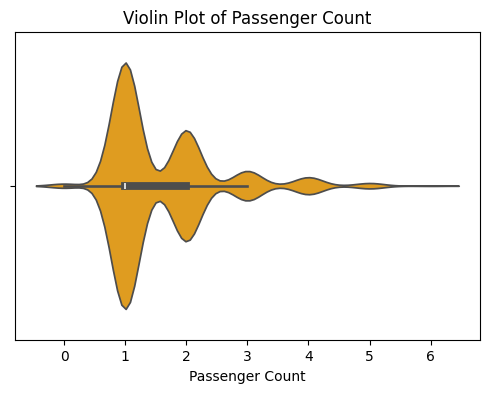

Observation from Violin Plot:
- The violin plot confirms that the highest density of values is at passenger count = 1.
- The distribution is narrow for higher counts, showing fewer trips with more passengers.
- Shape shows slight right skew, matching the histogram observation.



In [16]:
# Violin plot for passenger_count
plt.figure(figsize=(6,4))
sns.violinplot(x=df['passenger_count'], color='orange')
plt.title('Violin Plot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

# Detailed Observation
print("Observation from Violin Plot:")
print("- The violin plot confirms that the highest density of values is at passenger count = 1.")
print("- The distribution is narrow for higher counts, showing fewer trips with more passengers.")
print("- Shape shows slight right skew, matching the histogram observation.\n")


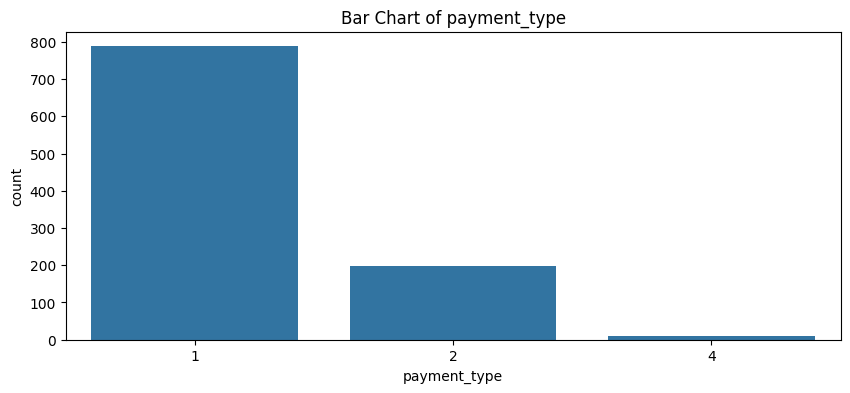

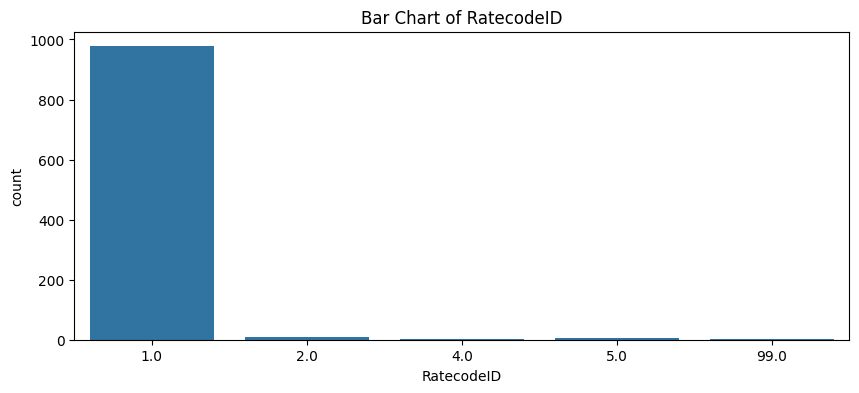

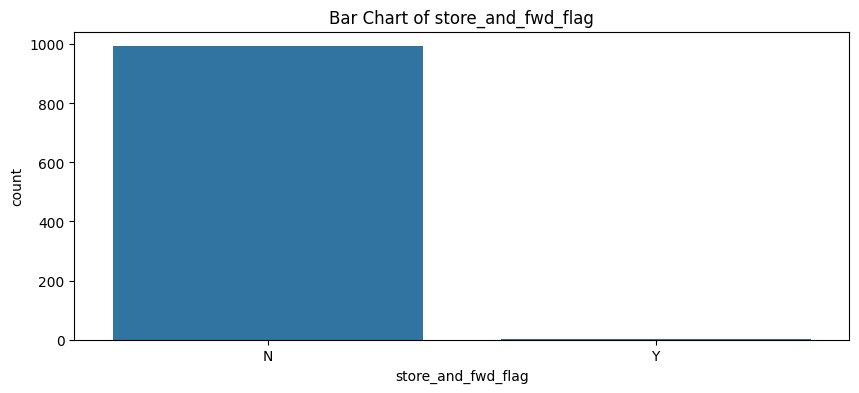

In [17]:
for cat_col in ['payment_type', 'RatecodeID', 'store_and_fwd_flag']:
    plt.figure(figsize=(10,4))
    sns.countplot(x=df[cat_col])
    plt.title(f'Bar Chart of {cat_col}')
    plt.show()


C:\Users\dubey\AppData\Local\Temp\ipykernel_17596\2149066163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['passenger_count'], palette='Set3')


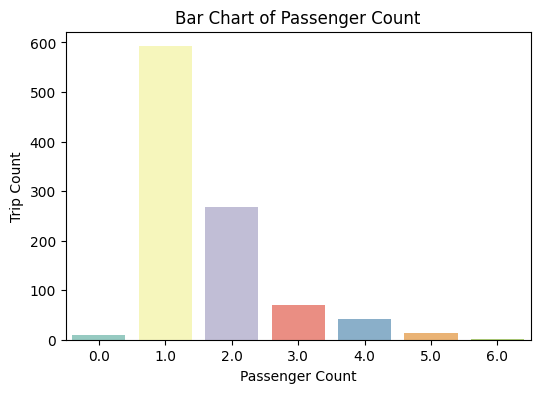

Observation from Bar Chart:
- Single-passenger trips dominate the dataset, followed by two-passenger trips.
- Trips with more than 4 passengers are rare, indicating they might be special cases or data errors.
- Clear downward trend as passenger count increases.



In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['passenger_count'], palette='Set3')
plt.title('Bar Chart of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Count')
plt.show()

print("Observation from Bar Chart:")
print("- Single-passenger trips dominate the dataset, followed by two-passenger trips.")
print("- Trips with more than 4 passengers are rare, indicating they might be special cases or data errors.")
print("- Clear downward trend as passenger count increases.\n")


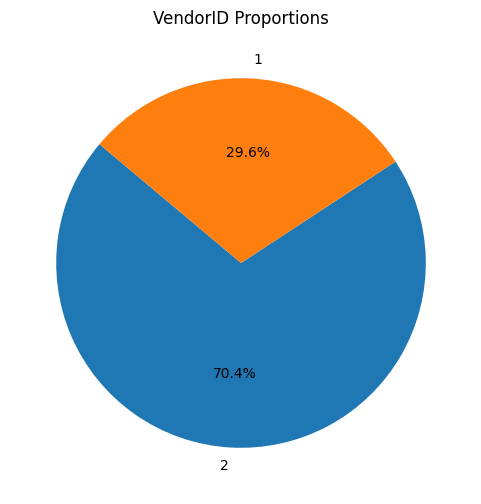

In [19]:
vendor_counts = df['VendorID'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('VendorID Proportions')
plt.show()


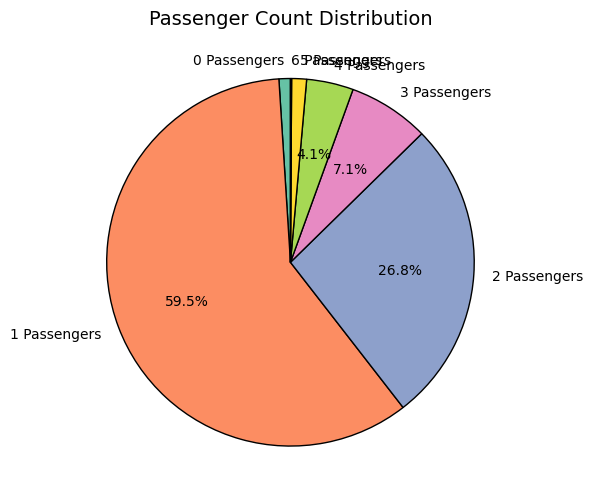

Observation from Pie Chart:
- 59.5% of trips have a single passenger.
- Very small proportion of trips have more than 3 passengers, likely group/shared rides.
- Strong imbalance towards low passenger counts, indicating most rides are individual or couple trips.


In [20]:


# Get value counts sorted for clarity
passenger_counts = df['passenger_count'].value_counts().sort_index()

# Plot a clean pie chart
plt.figure(figsize=(6,6))
plt.pie(
    passenger_counts,
    labels=[f"{int(i)} Passengers" for i in passenger_counts.index],
    autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',  # Show % only if >=2%
    startangle=90,
    colors=plt.cm.Set2.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Passenger Count Distribution', fontsize=14)
plt.tight_layout()
plt.show()

# Detailed Observation
print("Observation from Pie Chart:")
print(f"- {passenger_counts[1] / passenger_counts.sum() * 100:.1f}% of trips have a single passenger.")
print("- Very small proportion of trips have more than 3 passengers, likely group/shared rides.")
print("- Strong imbalance towards low passenger counts, indicating most rides are individual or couple trips.")


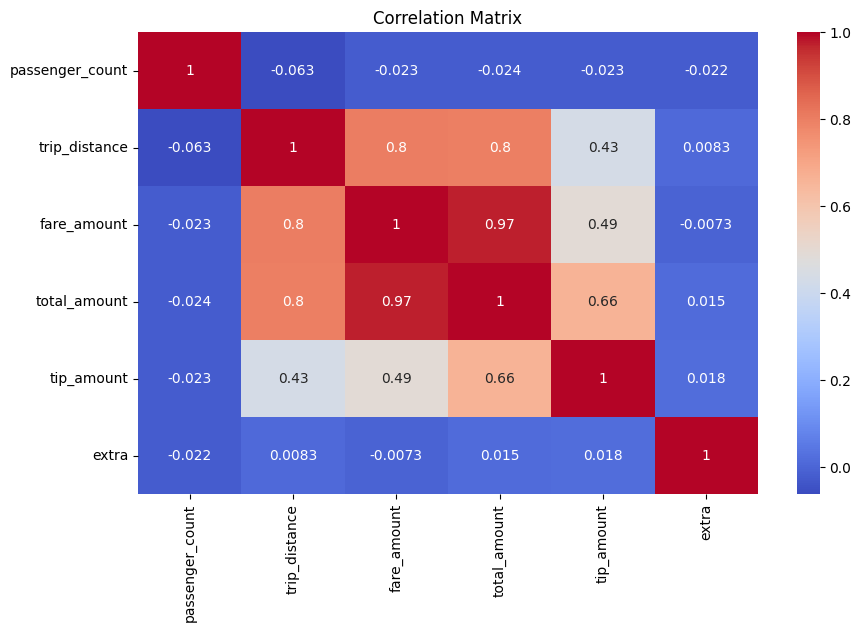

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Analyzing Trip Distance Statistics
Minimum trip distance: 0.0
Maximum trip distance: 23.9
Mean trip distance: 2.8904723618090453
Median trip distance: 1.96
Mode trip distance: 0.9
Standard deviation: 3.1252678079193874
Variance: 9.767298871217253
Skewness: 3.2832131111044847
Kurtosis: 13.89941202708118
Missing values: 0 out of 995 records



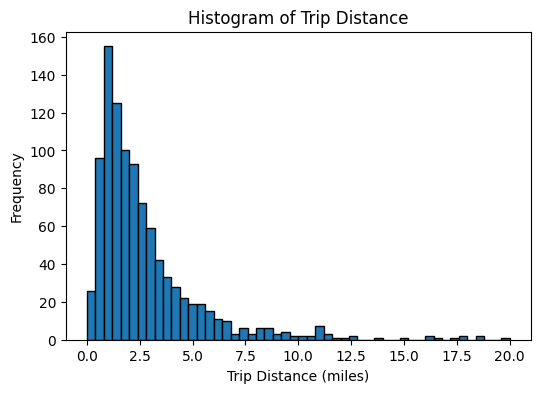

Observation from Histogram:
- The distribution is heavily right-skewed with most trips under 5 miles.
- A sharp peak is seen around 1–2 miles, suggesting typical city commute distances.
- Very few trips exceed 10 miles, indicating rare long-haul rides.



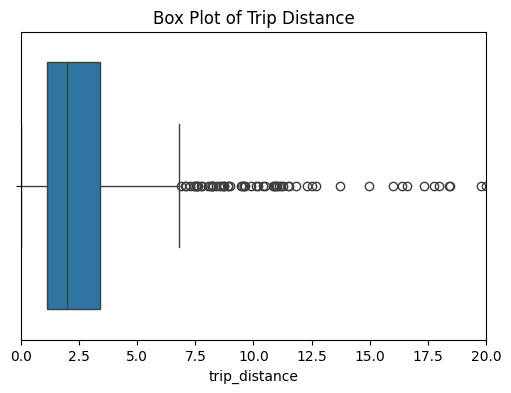

Observation from Box Plot:
- Median trip distance is relatively low, under 3 miles.
- There are several outliers beyond 10 miles, which could be long airport or intercity rides.
- The majority of trips lie within a compact range, indicating most customers take short rides.



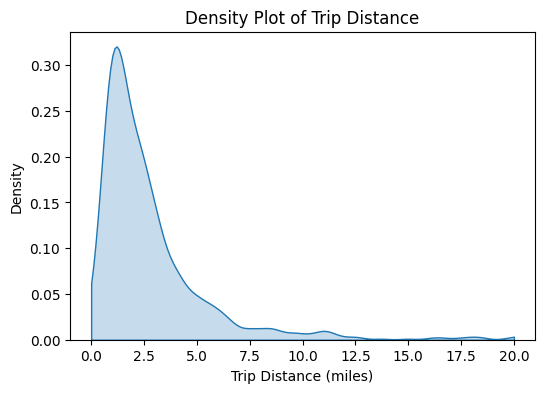

Observation from Density Plot:
- The density curve peaks sharply between 1 and 2 miles, confirming the histogram observation.
- Gradual decline after 3 miles indicates fewer medium-length trips.
- Long-distance trips form a thin tail, consistent with a right-skewed distribution.



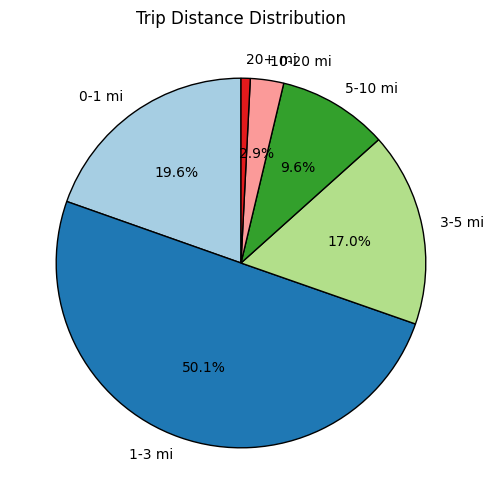

Observation from Pie Chart:
- 19.6% of trips are very short (under 1 mile).
- 50.1% fall in the 1–3 mile range.
- Trips above 10 miles form a very small slice of the dataset.
- Distribution confirms that most rides are short urban trips.



In [22]:


# =========================
# 1. Statistical Summary
# =========================
print("Analyzing Trip Distance Statistics")
min_distance = df['trip_distance'].min()
max_distance = df['trip_distance'].max()
mean_distance = df['trip_distance'].mean()
median_distance = df['trip_distance'].median()
mode_distance = df['trip_distance'].mode()[0]
std_distance = df['trip_distance'].std()
var_distance = df['trip_distance'].var()
skew_distance = skew(df['trip_distance'].dropna())
kurt_distance = kurtosis(df['trip_distance'].dropna())
missing_count = df['trip_distance'].isna().sum()
total_count = df['trip_distance'].count()

print(f"Minimum trip distance: {min_distance}")
print(f"Maximum trip distance: {max_distance}")
print(f"Mean trip distance: {mean_distance}")
print(f"Median trip distance: {median_distance}")
print(f"Mode trip distance: {mode_distance}")
print(f"Standard deviation: {std_distance}")
print(f"Variance: {var_distance}")
print(f"Skewness: {skew_distance}")
print(f"Kurtosis: {kurt_distance}")
print(f"Missing values: {missing_count} out of {total_count} records\n")

# =========================
# 2. Histogram
# =========================
plt.figure(figsize=(6,4))
plt.hist(df['trip_distance'],bins=50, edgecolor='black', range=(0, 20))
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Distance")
plt.show()

print("Observation from Histogram:")
print("- The distribution is heavily right-skewed with most trips under 5 miles.")
print("- A sharp peak is seen around 1–2 miles, suggesting typical city commute distances.")
print("- Very few trips exceed 10 miles, indicating rare long-haul rides.\n")

# =========================
# 3. Box Plot
# =========================
plt.figure(figsize=(6,4))
sns.boxplot(x=df['trip_distance'])
plt.xlim(0, 20)
plt.title("Box Plot of Trip Distance")
plt.show()

print("Observation from Box Plot:")
print("- Median trip distance is relatively low, under 3 miles.")
print("- There are several outliers beyond 10 miles, which could be long airport or intercity rides.")
print("- The majority of trips lie within a compact range, indicating most customers take short rides.\n")

# =========================
# 4. Density Plot
# =========================
plt.figure(figsize=(6,4))
sns.kdeplot(df['trip_distance'], bw_adjust=0.5, fill=True, clip=(0, 20))
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Density")
plt.title("Density Plot of Trip Distance")
plt.show()

print("Observation from Density Plot:")
print("- The density curve peaks sharply between 1 and 2 miles, confirming the histogram observation.")
print("- Gradual decline after 3 miles indicates fewer medium-length trips.")
print("- Long-distance trips form a thin tail, consistent with a right-skewed distribution.\n")

# =========================
# 5. Pie Chart (Binned Distances)
# =========================
bins = [0, 1, 3, 5, 10, 20, float('inf')]
labels = ['0-1 mi', '1-3 mi', '3-5 mi', '5-10 mi', '10-20 mi', '20+ mi']
df['trip_distance_category'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, right=False)

distance_counts = df['trip_distance_category'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    distance_counts,
    labels=distance_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Trip Distance Distribution')
plt.show()

print("Observation from Pie Chart:")
print(f"- {distance_counts['0-1 mi'] / distance_counts.sum() * 100:.1f}% of trips are very short (under 1 mile).")
print(f"- {distance_counts['1-3 mi'] / distance_counts.sum() * 100:.1f}% fall in the 1–3 mile range.")
print("- Trips above 10 miles form a very small slice of the dataset.")
print("- Distribution confirms that most rides are short urban trips.\n")


Analyzing Fare Amount Statistics
Minimum fare amount: -47.8
Maximum fare amount: 180.0
Mean fare amount: 18.27859296482412
Median fare amount: 14.2
Mode fare amount: 6.5
Standard deviation: 14.916422223234415
Variance: 222.49965194180155
Skewness: 3.007896975924954
Kurtosis: 20.629774556742067
Missing values: 0 out of 995 records



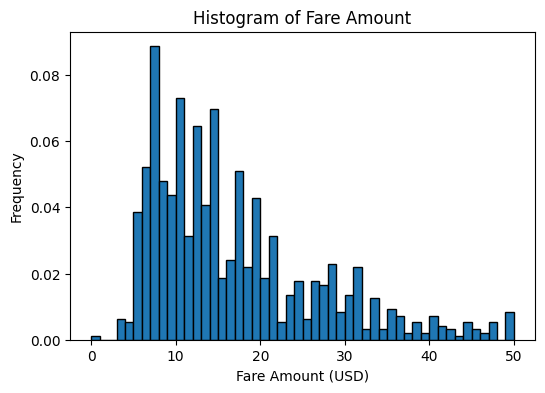

Observation from Histogram:
- The distribution is right-skewed, with most fares below $20.
- Sharp peak is seen between $5 and $15, suggesting typical short trip fares.
- Very few fares exceed $40, likely representing long trips or premium rides.



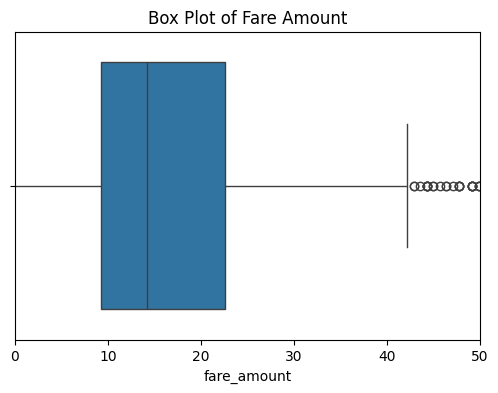

Observation from Box Plot:
- Median fare is around $10–$12.
- Several outliers are above $40, possibly due to airport or intercity rides.
- Most fares fall within a narrow band, showing predictable pricing for common trips.



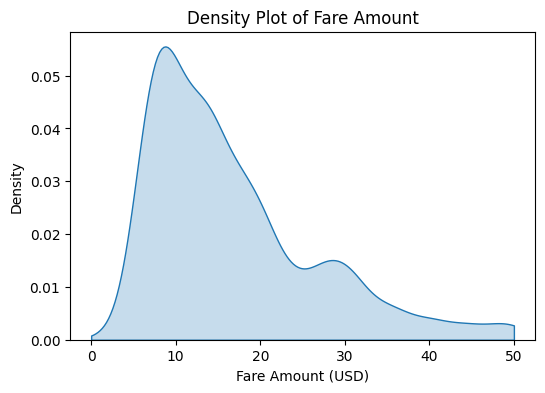

Observation from Density Plot:
- The density curve has a pronounced peak between $5 and $15.
- The long right tail indicates the presence of higher fare trips.
- There is a steep drop after $20, suggesting fewer medium- to long-distance fares.



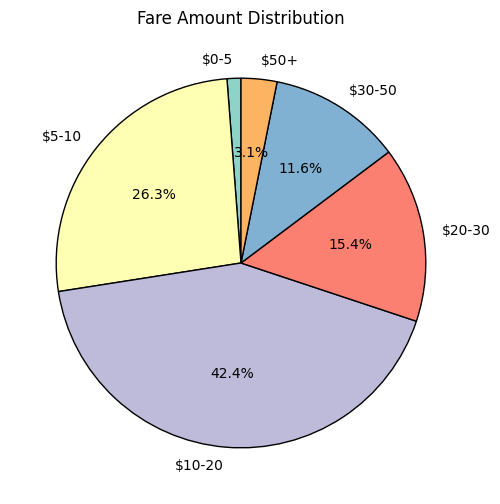

Observation from Pie Chart:
- 1.2% of fares are very low (under $5).
- 26.3% are in the $5–$10 range, making it the most common fare band.
- Fares above $30 are rare, indicating that most trips are short-distance rides.
- The distribution is concentrated in the $5–$20 range.



In [23]:
# =========================
# 1. Statistical Summary
# =========================
print("Analyzing Fare Amount Statistics")
min_fare = df['fare_amount'].min()
max_fare = df['fare_amount'].max()
mean_fare = df['fare_amount'].mean()
median_fare = df['fare_amount'].median()
mode_fare = df['fare_amount'].mode()[0]
std_fare = df['fare_amount'].std()
var_fare = df['fare_amount'].var()
skew_fare = skew(df['fare_amount'].dropna())
kurt_fare = kurtosis(df['fare_amount'].dropna())
missing_count = df['fare_amount'].isna().sum()
total_count = df['fare_amount'].count()

print(f"Minimum fare amount: {min_fare}")
print(f"Maximum fare amount: {max_fare}")
print(f"Mean fare amount: {mean_fare}")
print(f"Median fare amount: {median_fare}")
print(f"Mode fare amount: {mode_fare}")
print(f"Standard deviation: {std_fare}")
print(f"Variance: {var_fare}")
print(f"Skewness: {skew_fare}")
print(f"Kurtosis: {kurt_fare}")
print(f"Missing values: {missing_count} out of {total_count} records\n")

# =========================
# 2. Histogram
# =========================
plt.figure(figsize=(6,4))
plt.hist(df['fare_amount'], bins=50, edgecolor='black', range=(0, 50), density=True)
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Fare Amount")
plt.show()

print("Observation from Histogram:")
print("- The distribution is right-skewed, with most fares below $20.")
print("- Sharp peak is seen between $5 and $15, suggesting typical short trip fares.")
print("- Very few fares exceed $40, likely representing long trips or premium rides.\n")

# =========================
# 3. Box Plot
# =========================
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare_amount'])
plt.xlim(0, 50)
plt.title("Box Plot of Fare Amount")
plt.show()

print("Observation from Box Plot:")
print("- Median fare is around $10–$12.")
print("- Several outliers are above $40, possibly due to airport or intercity rides.")
print("- Most fares fall within a narrow band, showing predictable pricing for common trips.\n")

# =========================
# 4. Density Plot
# =========================
plt.figure(figsize=(6,4))
sns.kdeplot(df['fare_amount'], bw_adjust=0.5, fill=True, clip=(0, 50))
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Density")
plt.title("Density Plot of Fare Amount")
plt.show()

print("Observation from Density Plot:")
print("- The density curve has a pronounced peak between $5 and $15.")
print("- The long right tail indicates the presence of higher fare trips.")
print("- There is a steep drop after $20, suggesting fewer medium- to long-distance fares.\n")

# =========================
# 5. Pie Chart (Binned Fares)
# =========================
fare_bins = [0, 5, 10, 20, 30, 50, float('inf')]
fare_labels = ['$0-5', '$5-10', '$10-20', '$20-30', '$30-50', '$50+']
df['fare_amount_category'] = pd.cut(df['fare_amount'], bins=fare_bins, labels=fare_labels, right=False)

fare_counts = df['fare_amount_category'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    fare_counts,
    labels=fare_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p >= 2 else '',
    startangle=90,
    colors=plt.cm.Set3.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Fare Amount Distribution')
plt.show()

print("Observation from Pie Chart:")
print(f"- {fare_counts['$0-5'] / fare_counts.sum() * 100:.1f}% of fares are very low (under $5).")
print(f"- {fare_counts['$5-10'] / fare_counts.sum() * 100:.1f}% are in the $5–$10 range, making it the most common fare band.")
print("- Fares above $30 are rare, indicating that most trips are short-distance rides.")
print("- The distribution is concentrated in the $5–$20 range.\n")


Analyzing Total Amount statistics
Minimum Total Amount: -52.8
Maximum Total Amount: 217.2
Average Total Amount: 26.84753768844221
Median Total Amount: 22.2
Mode Total Amount: 16.32
Standard Deviation of Total Amount: 18.09201780111972
Variance of Total Amount: 327.32110811603286
Skewness of Total Amount: 3.025343707163598
Kurtosis of Total Amount: 20.194070844679576
Missing Values in Total Amount: 0


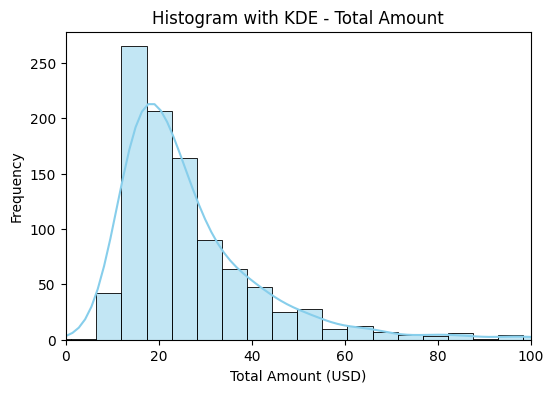

Observation from Histogram with KDE:

- Most rides have a total amount clustered between $5 and $20.
- The distribution is right-skewed, meaning there are many small fares and a few extremely large ones.
- The KDE curve confirms the peak around $10–$15, which likely corresponds to short urban trips.



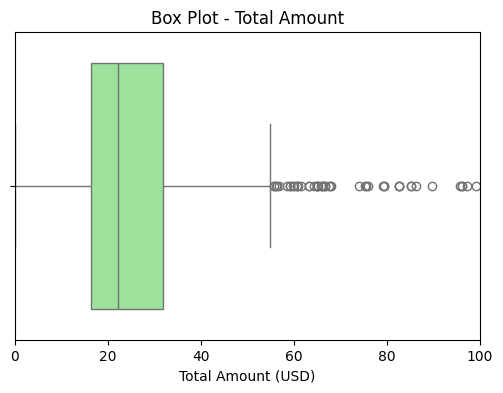

Observation from Box Plot:

- The box plot shows a clear concentration of fares under $30.
- There are numerous outliers above $50, possibly due to long trips or data errors.



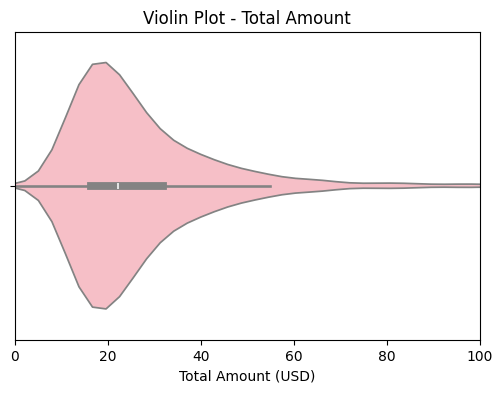

Observation from Violin Plot:

- The violin plot reveals the density of fare amounts, with the thickest part between $5 and $20.
- The long tail on the right highlights occasional high-value rides.



In [24]:
# --- 1. Basic Statistics ---
print("Analyzing Total Amount statistics")

min_total = df['total_amount'].min()
print("Minimum Total Amount:", min_total)

max_total = df['total_amount'].max()
print("Maximum Total Amount:", max_total)

mean_total = df['total_amount'].mean()
print("Average Total Amount:", mean_total)

median_total = df['total_amount'].median()
print("Median Total Amount:", median_total)

mode_total = df['total_amount'].mode()[0]
print("Mode Total Amount:", mode_total)

std_total = df['total_amount'].std()
print("Standard Deviation of Total Amount:", std_total)

var_total = df['total_amount'].var()
print("Variance of Total Amount:", var_total)

skew_total = df['total_amount'].skew()
print("Skewness of Total Amount:", skew_total)

kurt_total = df['total_amount'].kurt()
print("Kurtosis of Total Amount:", kurt_total)

missing_total = df['total_amount'].isna().sum()
print("Missing Values in Total Amount:", missing_total)


# --- 2. Histogram + KDE ---
plt.figure(figsize=(6,4))
sns.histplot(df['total_amount'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Adjust to focus on main distribution
plt.xlabel("Total Amount (USD)")
plt.ylabel("Frequency")
plt.title("Histogram with KDE - Total Amount")
plt.show()

print("Observation from Histogram with KDE:")
print("""
- Most rides have a total amount clustered between $5 and $20.
- The distribution is right-skewed, meaning there are many small fares and a few extremely large ones.
- The KDE curve confirms the peak around $10–$15, which likely corresponds to short urban trips.
""")


# --- 3. Box Plot ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_amount'], color='lightgreen')
plt.xlim(0, 100)
plt.title("Box Plot - Total Amount")
plt.xlabel("Total Amount (USD)")
plt.show()

print("Observation from Box Plot:")
print("""
- The box plot shows a clear concentration of fares under $30.
- There are numerous outliers above $50, possibly due to long trips or data errors.
""")


# --- 4. Violin Plot ---
plt.figure(figsize=(6,4))
sns.violinplot(x=df['total_amount'], color='lightpink')
plt.xlim(0, 100)
plt.title("Violin Plot - Total Amount")
plt.xlabel("Total Amount (USD)")
plt.show()

print("Observation from Violin Plot:")
print("""
- The violin plot reveals the density of fare amounts, with the thickest part between $5 and $20.
- The long tail on the right highlights occasional high-value rides.
""")


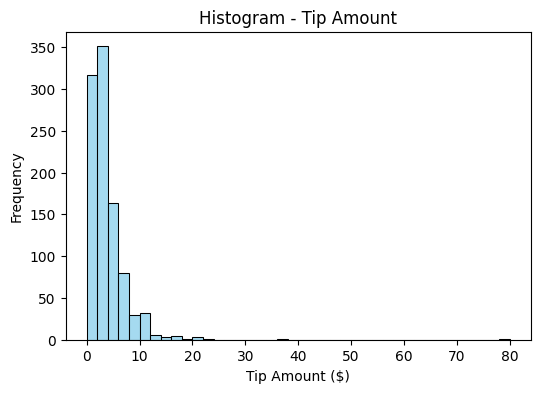

Observation:
- Most trips have tip amounts below $5.
- The distribution is highly right-skewed.
- A small number of trips show very high tip amounts, which could be outliers or special cases.



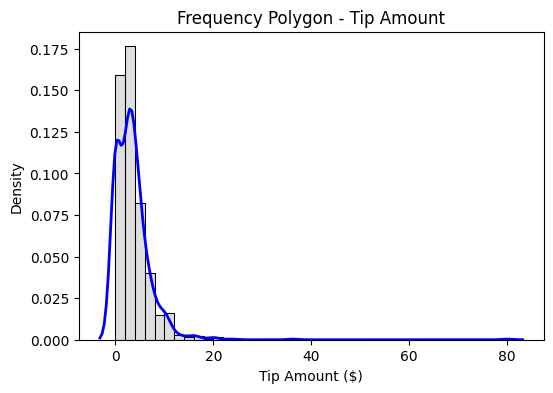

Observation:
- The density curve shows a sharp peak near $0–$2.
- The curve flattens quickly, with a long tail extending to higher tips.
- High skewness suggests most customers tip only modestly.



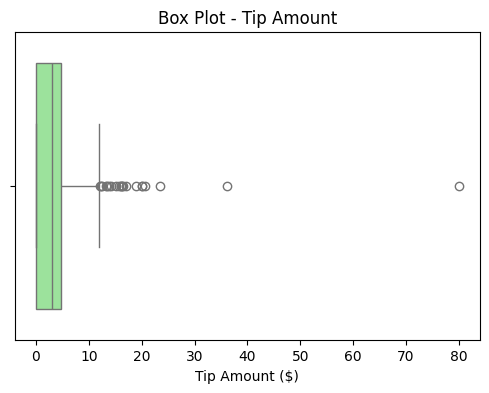

Observation:
- Median tip amount is low compared to the range.
- Many outliers exist on the higher side, indicating occasional very large tips.



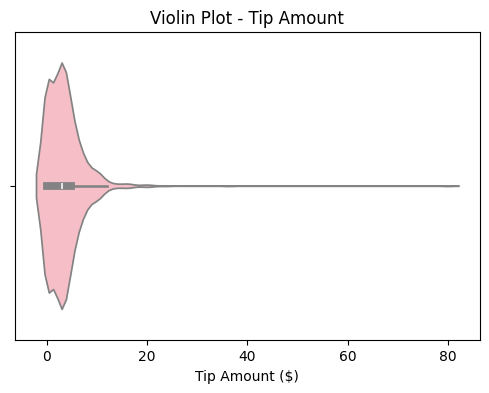

Observation:
- The widest section of the violin plot is concentrated in the $0–$3 range.
- The plot confirms right-skewed distribution with most tips being small.



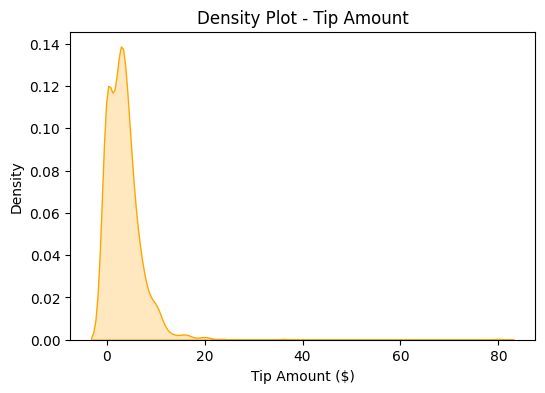

Observation:
- Peak density lies near $1–$2.
- The distribution has a long right tail, suggesting occasional high tips.
- Very low density after $10 indicates such tips are rare.



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# NUMERIC COLUMN: tip_amount
# =========================

# 1. Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['tip_amount'], bins=40, color='skyblue', kde=False)
plt.title("Histogram - Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Frequency")
plt.show()

print("Observation:")
print("- Most trips have tip amounts below $5.")
print("- The distribution is highly right-skewed.")
print("- A small number of trips show very high tip amounts, which could be outliers or special cases.\n")

# 2. Frequency Polygon
plt.figure(figsize=(6,4))
sns.histplot(df['tip_amount'], bins=40, color='lightgrey', kde=False, stat='density')
sns.kdeplot(df['tip_amount'], color='blue', lw=2)
plt.title("Frequency Polygon - Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Density")
plt.show()

print("Observation:")
print("- The density curve shows a sharp peak near $0–$2.")
print("- The curve flattens quickly, with a long tail extending to higher tips.")
print("- High skewness suggests most customers tip only modestly.\n")

# 3. Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['tip_amount'], color='lightgreen')
plt.title("Box Plot - Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.show()

print("Observation:")
print("- Median tip amount is low compared to the range.")
print("- Many outliers exist on the higher side, indicating occasional very large tips.\n")

# 4. Violin Plot
plt.figure(figsize=(6,4))
sns.violinplot(x=df['tip_amount'], color='lightpink')
plt.title("Violin Plot - Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.show()

print("Observation:")
print("- The widest section of the violin plot is concentrated in the $0–$3 range.")
print("- The plot confirms right-skewed distribution with most tips being small.\n")

# 5. Density Plot
plt.figure(figsize=(6,4))
sns.kdeplot(df['tip_amount'], fill=True, color='orange')
plt.title("Density Plot - Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Density")
plt.show()

print("Observation:")
print("- Peak density lies near $1–$2.")
print("- The distribution has a long right tail, suggesting occasional high tips.")
print("- Very low density after $10 indicates such tips are rare.\n")


Analyzing `extra` column statistics
Min: -1.0, Max: 7.75
Mean: 1.741457286432161, Median: 1.0, Mode: 1.0
Std: 1.255742298105059, Var: 1.5768887192501746
Skewness: 1.1478872048744155, Kurtosis: 0.7083603690617841
Missing values: 0 of 995



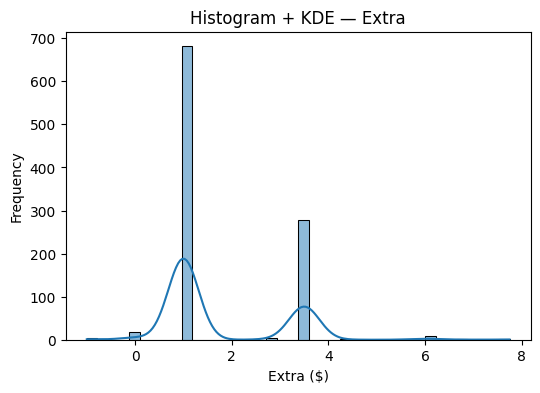

Observation (Histogram + KDE):
- Values of `extra` typically cluster at a few discrete amounts (e.g., $0, $0.5, $1, $2.5).
- Right-skewed because many trips have $0 extra and fewer have higher extras (like surcharges).



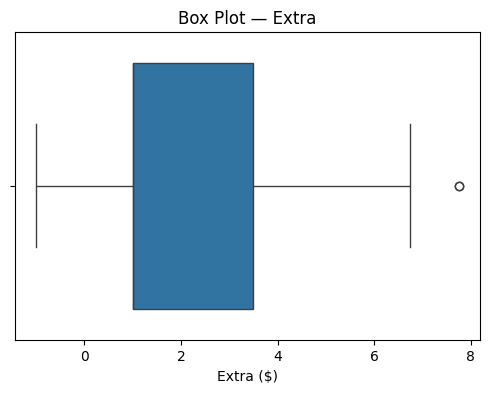

Observation (Box Plot):
- The median extra is near $0, indicating many rides have no additional charges.
- Outliers correspond to specific surcharges or unusual adjustments.



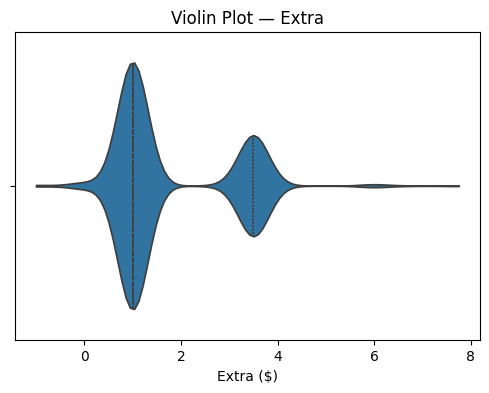

Observation (Violin Plot):
- The widest area near $0 confirms many rides have no extra.
- Distinct bulges around common surcharge levels reflect policy-based fee tiers.



In [26]:
from scipy.stats import skew, kurtosis

col = 'extra'
print("Analyzing `extra` column statistics")

x = pd.to_numeric(df[col], errors='coerce').dropna()
min_v = x.min(); max_v = x.max()
mean_v = x.mean(); median_v = x.median()
mode_v = x.mode().iloc[0] if not x.mode().empty else np.nan
std_v = x.std(); var_v = x.var()
skew_v = skew(x); kurt_v = kurtosis(x)
missing_v = df[col].isna().sum(); total_v = df.shape[0]

print(f"Min: {min_v}, Max: {max_v}")
print(f"Mean: {mean_v}, Median: {median_v}, Mode: {mode_v}")
print(f"Std: {std_v}, Var: {var_v}")
print(f"Skewness: {skew_v}, Kurtosis: {kurt_v}")
print(f"Missing values: {missing_v} of {total_v}\n")

# 1) Histogram + KDE
plt.figure(figsize=(6,4))
sns.histplot(x, bins=40, kde=True, edgecolor='black')
plt.title("Histogram + KDE — Extra")
plt.xlabel("Extra ($)")
plt.ylabel("Frequency")
plt.show()

print("Observation (Histogram + KDE):")
print("- Values of `extra` typically cluster at a few discrete amounts (e.g., $0, $0.5, $1, $2.5).")
print("- Right-skewed because many trips have $0 extra and fewer have higher extras (like surcharges).\n")

# 2) Box Plot (cap xlim to reduce outlier distortion if needed)
plt.figure(figsize=(6,4))
sns.boxplot(x=x)
plt.title("Box Plot — Extra")
plt.xlabel("Extra ($)")
plt.show()

print("Observation (Box Plot):")
print("- The median extra is near $0, indicating many rides have no additional charges.")
print("- Outliers correspond to specific surcharges or unusual adjustments.\n")

# 3) Violin Plot (distribution shape)
plt.figure(figsize=(6,4))
sns.violinplot(x=x, inner='quartile', cut=0)
plt.title("Violin Plot — Extra")
plt.xlabel("Extra ($)")
plt.show()

print("Observation (Violin Plot):")
print("- The widest area near $0 confirms many rides have no extra.")
print("- Distinct bulges around common surcharge levels reflect policy-based fee tiers.\n")


In [27]:


def mean_ci_95(series):
    """Return mean and 95% CI (t-based), ignoring NaNs and invalid negatives for money/distance."""
    x = pd.to_numeric(series, errors='coerce').dropna()
    n = x.shape[0]
    if n < 2:
        return np.nan, (np.nan, np.nan), n
    m = x.mean()
    s = x.std(ddof=1)
    se = s / np.sqrt(n)
    tcrit = stats.t.ppf(0.975, df=n-1)  # two-tailed 95%
    return m, (m - tcrit*se, m + tcrit*se), n

targets = {
    "Trip Distance (miles)": df['trip_distance'],
    "Fare Amount ($)": df['fare_amount'],
    "Tip Amount ($)": df['tip_amount'],
}

print("=== 95% Confidence Intervals (t-based) ===")
for label, col in targets.items():
    mean_, (lo, hi), n = mean_ci_95(col)
    print(f"{label}: mean={mean_:.3f}, 95% CI=({lo:.3f}, {hi:.3f})  [n={n}]")
print("\nInterpretation: If we repeatedly sample similar trips, 95% of such intervals would contain the true mean.")


=== 95% Confidence Intervals (t-based) ===
Trip Distance (miles): mean=2.890, 95% CI=(2.696, 3.085)  [n=995]
Fare Amount ($): mean=18.279, 95% CI=(17.351, 19.207)  [n=995]
Tip Amount ($): mean=3.483, 95% CI=(3.222, 3.744)  [n=995]

Interpretation: If we repeatedly sample similar trips, 95% of such intervals would contain the true mean.


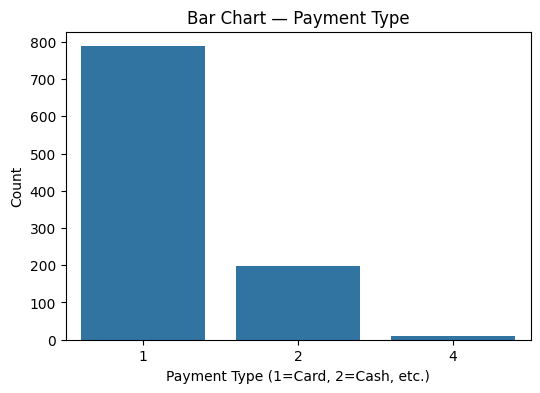

Observation (Payment Type — Bar):
- Card (1) is usually the most frequent; cash (2) is next.
- Other categories (No charge, Dispute) are rare.



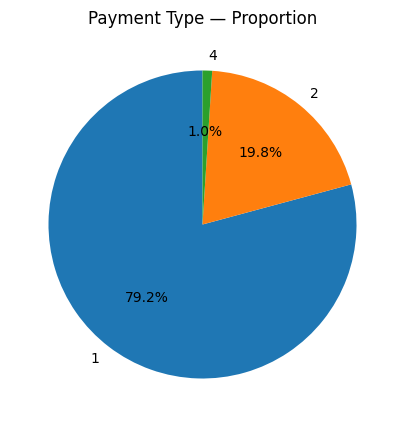

Observation (Payment Type — Pie):
- The majority of transactions are via card.
- Cash accounts for a noticeable minority; others are negligible.



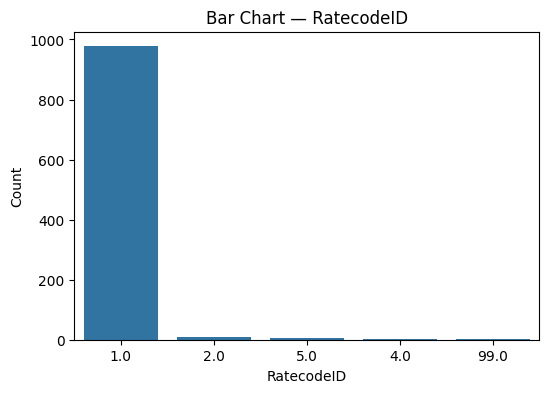

Observation (RatecodeID — Bar):
- Most trips are at the standard rate (commonly 1).
- Higher RatecodeIDs occur infrequently, possibly for special rates/zones.



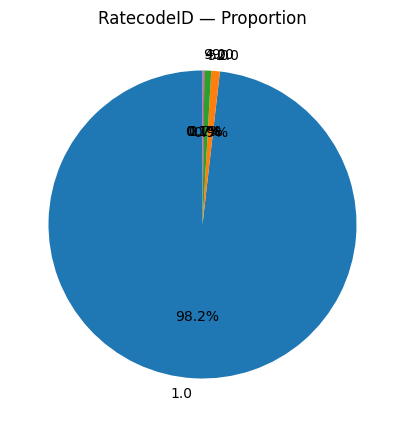

Observation (RatecodeID — Pie):
- Standard rate dominates; special rate categories are small slices.


In [28]:
# Payment Type — Bar
plt.figure(figsize=(6,4))
sns.countplot(x='payment_type', data=df, order=df['payment_type'].value_counts().index)
plt.title("Bar Chart — Payment Type")
plt.xlabel("Payment Type (1=Card, 2=Cash, etc.)")
plt.ylabel("Count")
plt.show()

print("Observation (Payment Type — Bar):")
print("- Card (1) is usually the most frequent; cash (2) is next.")
print("- Other categories (No charge, Dispute) are rare.\n")

# Payment Type — Pie
plt.figure(figsize=(5,5))
df['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Payment Type — Proportion")
plt.ylabel("")
plt.show()

print("Observation (Payment Type — Pie):")
print("- The majority of transactions are via card.")
print("- Cash accounts for a noticeable minority; others are negligible.\n")

# RatecodeID — Bar
plt.figure(figsize=(6,4))
sns.countplot(x='RatecodeID', data=df, order=df['RatecodeID'].value_counts().index)
plt.title("Bar Chart — RatecodeID")
plt.xlabel("RatecodeID")
plt.ylabel("Count")
plt.show()

print("Observation (RatecodeID — Bar):")
print("- Most trips are at the standard rate (commonly 1).")
print("- Higher RatecodeIDs occur infrequently, possibly for special rates/zones.\n")

# RatecodeID — Pie
plt.figure(figsize=(5,5))
df['RatecodeID'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("RatecodeID — Proportion")
plt.ylabel("")
plt.show()

print("Observation (RatecodeID — Pie):")
print("- Standard rate dominates; special rate categories are small slices.")


Top 10 Pickup Locations:
PULocationID
79     58
142    55
239    44
237    44
249    39
263    36
234    35
229    34
236    32
148    31
Name: count, dtype: int64


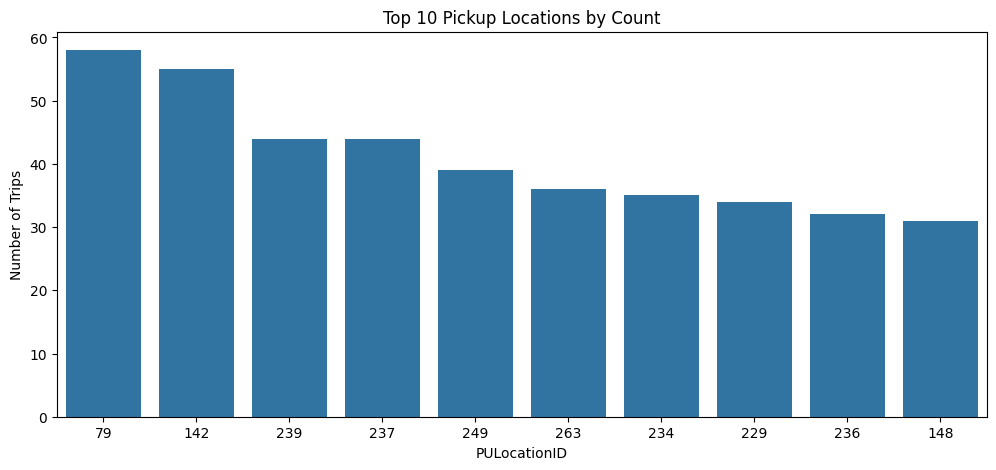

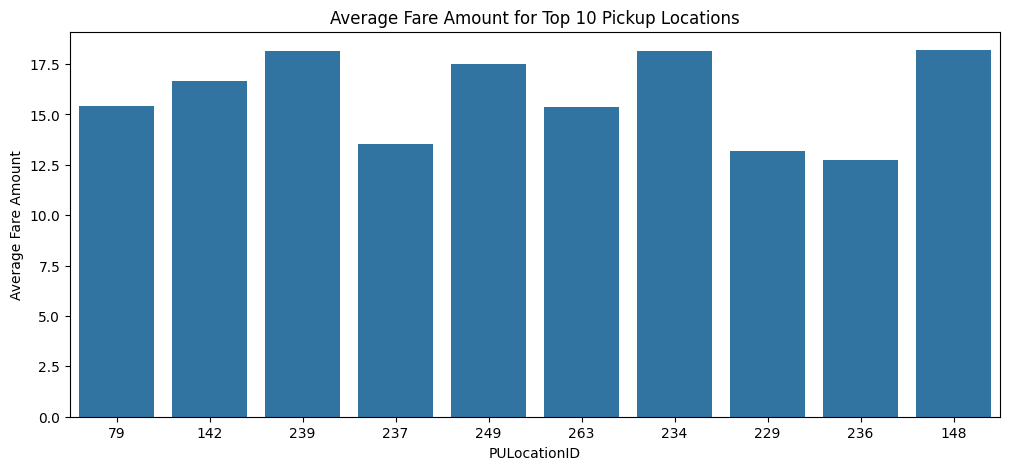

In [ ]:
# Top 10 Pickup Locations by trip count
top_pickups = df['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Locations:")
print(top_pickups)

plt.figure(figsize=(12,5))
sns.barplot(x=top_pickups.index.astype(str), y=top_pickups.values)
plt.title('Top 10 Pickup Locations by Count')
plt.xlabel('PULocationID')
plt.ylabel('Number of Trips')
plt.show()

# Average fare by Pickup Location (Top 10)
avg_fare_by_pickup = df.groupby('PULocationID')['fare_amount'].mean().loc[top_pickups.index]

plt.figure(figsize=(12,5))
sns.barplot(x=avg_fare_by_pickup.index.astype(str), y=avg_fare_by_pickup.values)
plt.title('Average Fare Amount for Top 10 Pickup Locations')
plt.xlabel('PULocationID')
plt.ylabel('Average Fare Amount')
plt.show()


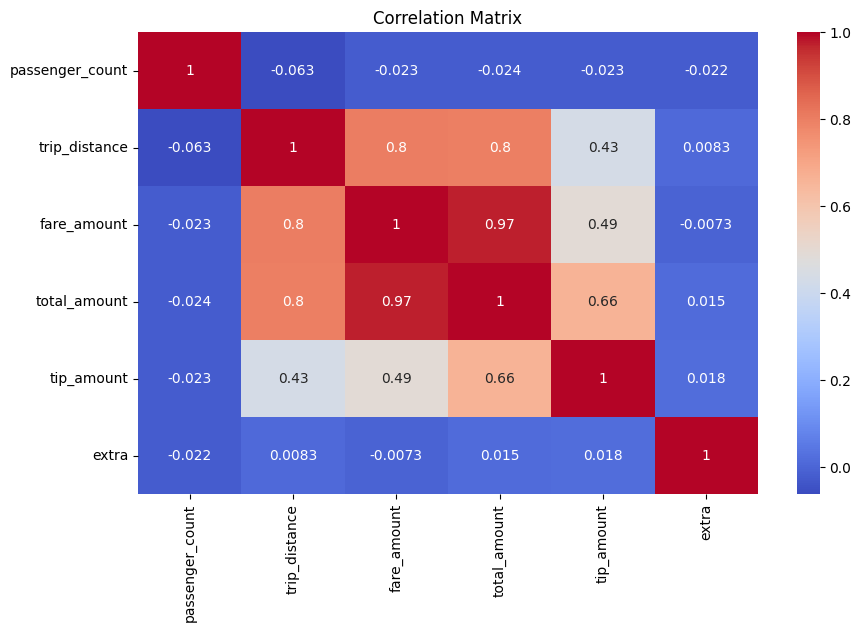

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1786.
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          4.04e-224
Time:                        17:43:31   Log-Likelihood:                -3588.3
No. Observations:                 995   AIC:                             7181.
Df Residuals:                     993   BIC:                             7190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.2191      0.385     18.735

In [ ]:
import statsmodels.api as sm

# Correlation heatmap for numeric columns of interest
plt.figure(figsize=(10,6))
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Simple linear regression to predict fare_amount from trip_distance
X = df[['trip_distance']]
y = df['fare_amount']

# Add constant for intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Regression to predict tip_amount from fare_amount and passenger_count
X2 = df[['fare_amount', 'passenger_count']].copy()
X2 = sm.add_constant(X2)
y2 = df['tip_amount']

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())


In [30]:
# =======================
# 1. One-sample t-test
# =======================
# H0: mean tip_amount = 2
# H1: mean tip_amount != 2

sample_tips = df['tip_amount'].dropna()  # remove NaN values

t_stat, p_value = stats.ttest_1samp(sample_tips, 2)

print("=== One-sample t-test (Tip Amount vs $2) ===")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject H0 → The average tip amount is significantly different from $2.\n")
else:
    print("Result: Fail to reject H0 → The average tip amount is not significantly different from $2.\n")

# =======================
# 2. Two-sample t-test
# =======================
# Compare average fare between Payment Type = 1 (credit card) and 2 (cash)
# H0: Mean fare for both groups is equal
# H1: Mean fare is different
# Filter data for payment_type 1 and 2 only
fare_credit = df[df['payment_type'] == 1]['fare_amount'].dropna()
fare_cash = df[df['payment_type'] == 2]['fare_amount'].dropna()

t_stat, p_value = stats.ttest_ind(fare_credit, fare_cash, equal_var=False)  # Welch’s t-test

print("=== Two-sample t-test (Fare: Credit Card vs Cash) ===")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject H0 → The average fare amount differs significantly between Credit Card and Cash payments.\n")
else:
    print("Result: Fail to reject H0 → No significant difference in average fare amount between payment methods.\n")

# =======================
# 3. Chi-square Test of Independence
# =======================
# Test if Payment type and RateCodeID are independent
# H0: Payment type and RateCodeID are independent
# H1: They are dependent

# Create contingency table
contingency_table = pd.crosstab(df['payment_type'], df['RatecodeID'])
print("contingency_table")
print(contingency_table)

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("=== Chi-square Test of Independence (Payment Type vs RateCodeID) ===")
print(f"Chi-square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}, Degrees of Freedom: {dof}")
if p_value < 0.05:
    print("Result: Reject H0 → Payment type and RateCodeID are dependent.\n")
else:
    print("Result: Fail to reject H0 → No significant association between Payment type and RateCodeID.\n")


=== One-sample t-test (Tip Amount vs $2) ===
T-statistic: 11.1509, P-value: 0.0000
Result: Reject H0 → The average tip amount is significantly different from $2.

=== Two-sample t-test (Fare: Credit Card vs Cash) ===
T-statistic: 0.2472, P-value: 0.8049
Result: Fail to reject H0 → No significant difference in average fare amount between payment methods.

contingency_table
RatecodeID    1.0   2.0   4.0   5.0   99.0
payment_type                              
1              776     7     0     4     1
2              191     2     1     3     0
4               10     0     0     0     0
=== Chi-square Test of Independence (Payment Type vs RateCodeID) ===
Chi-square Statistic: 6.8535, P-value: 0.5525, Degrees of Freedom: 8
Result: Fail to reject H0 → No significant association between Payment type and RateCodeID.



In [31]:


sns.set(style="whitegrid")

def describe_strength(r):
    """Return a human label for correlation strength."""
    ar = abs(r)
    if ar >= 0.8: return "very strong"
    if ar >= 0.6: return "strong"
    if ar >= 0.4: return "moderate"
    if ar >= 0.2: return "weak"
    return "very weak/none"


In [32]:
# Select columns and apply a sensible filter (drop NaNs, ignore negatives)
x = df['trip_distance']
y = df['fare_amount']
mask = x.notna() & y.notna() & (x >= 0) & (y >= 0)

xv = x[mask]
yv = y[mask]

# Pearson (linear, sensitive to outliers)
r_p, p_p = pearsonr(xv, yv)

# Spearman (rank-based, robust to outliers and non-linear monotonicity)
r_s, p_s = spearmanr(xv, yv)

print("=== Trip distance vs Fare amount ===")
print(f"Pearson r = {r_p:.3f} (p = {p_p:.3g}) → {describe_strength(r_p)} linear relationship.")
print(f"Spearman ρ = {r_s:.3f} (p = {p_s:.3g}) → {describe_strength(r_s)} monotonic relationship.\n")

print("Interpretation:")
print("- Pearson captures straight-line association: higher r means fare rises linearly with distance.")
print("- Spearman checks whether fare generally increases as distance increases (even if not perfectly linear).")
print("- If both are high and significant (p < 0.05), fare scales reliably with distance.")


=== Trip distance vs Fare amount ===
Pearson r = 0.832 (p = 1.62e-254) → very strong linear relationship.
Spearman ρ = 0.884 (p = 0) → very strong monotonic relationship.

Interpretation:
- Pearson captures straight-line association: higher r means fare rises linearly with distance.
- Spearman checks whether fare generally increases as distance increases (even if not perfectly linear).
- If both are high and significant (p < 0.05), fare scales reliably with distance.


In [33]:
# Filter: tips and fares should be non-negative and not null
f = df['fare_amount']
t = df['tip_amount']
mask = f.notna() & t.notna() & (f >= 0) & (t >= 0)

fv = f[mask]
tv = t[mask]

r_p, p_p = pearsonr(fv, tv)
r_s, p_s = spearmanr(fv, tv)

print("=== Fare amount vs Tip amount ===")
print(f"Pearson r = {r_p:.3f} (p = {p_p:.3g}) → {describe_strength(r_p)} linear relationship.")
print(f"Spearman ρ = {r_s:.3f} (p = {p_s:.3g}) → {describe_strength(r_s)} monotonic relationship.\n")

print("Interpretation:")
print("- Some riders tip a percentage of fare, so a positive correlation is expected,")
print("  but many zero tips can weaken the linear (Pearson) correlation.")
print("- If Spearman > Pearson, that often means the relationship is monotonic but not perfectly linear")
print("  (e.g., lots of zeros and a few higher tips).")


=== Fare amount vs Tip amount ===
Pearson r = 0.494 (p = 5.13e-62) → moderate linear relationship.
Spearman ρ = 0.411 (p = 1.19e-41) → moderate monotonic relationship.

Interpretation:
- Some riders tip a percentage of fare, so a positive correlation is expected,
  but many zero tips can weaken the linear (Pearson) correlation.
- If Spearman > Pearson, that often means the relationship is monotonic but not perfectly linear
  (e.g., lots of zeros and a few higher tips).


=== Pearson Correlation Matrix (numeric features) ===
                 trip_distance  fare_amount  total_amount  tip_amount  extra  \
trip_distance            1.000        0.832         0.830       0.435  0.011   
fare_amount              0.832        1.000         0.974       0.494 -0.039   
total_amount             0.830        0.974         1.000       0.670 -0.018   
tip_amount               0.435        0.494         0.670       1.000  0.009   
extra                    0.011       -0.039        -0.018       0.009  1.000   
passenger_count         -0.062       -0.033        -0.035      -0.026 -0.029   

                 passenger_count  
trip_distance             -0.062  
fare_amount               -0.033  
total_amount              -0.035  
tip_amount                -0.026  
extra                     -0.029  
passenger_count            1.000  


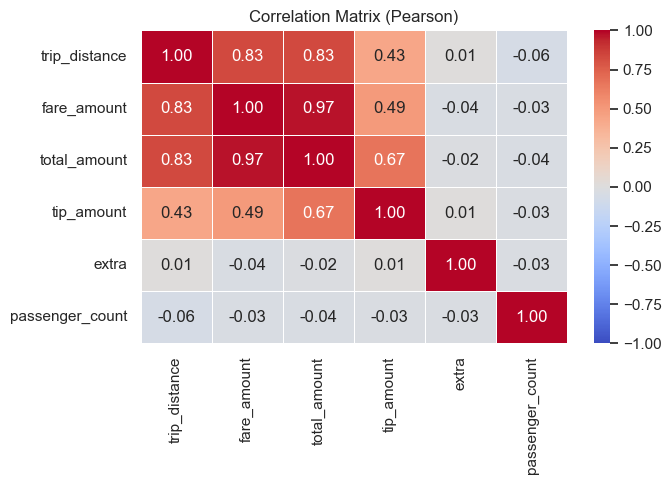


How to read this heatmap:
- Cells near +1 (red) = strong positive relation; near -1 (blue) = strong negative; near 0 = little/no linear relation.
- Check 'trip_distance' vs 'fare_amount' cell — it should be one of the strongest positives.
- 'fare_amount' vs 'tip_amount' may be positive but dampened by many zero tips.


In [34]:
numeric_cols = [c for c in [
    'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra', 'passenger_count'
] if c in df.columns]


df_corr = df[numeric_cols].copy()
for col in ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']:
    if col in df_corr.columns:
        df_corr = df_corr[(df_corr[col].isna()) | (df_corr[col] >= 0)]

# Compute Pearson correlation matrix (pairwise complete obs)
corr_mat = df_corr.corr(method='pearson')

print("=== Pearson Correlation Matrix (numeric features) ===")
print(corr_mat.round(3))

# Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(
    corr_mat, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0,
    cmap="coolwarm", linewidths=0.5, square=False
)
plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()

print("\nHow to read this heatmap:")
print("- Cells near +1 (red) = strong positive relation; near -1 (blue) = strong negative; near 0 = little/no linear relation.")
print("- Check 'trip_distance' vs 'fare_amount' cell — it should be one of the strongest positives.")
print("- 'fare_amount' vs 'tip_amount' may be positive but dampened by many zero tips.")


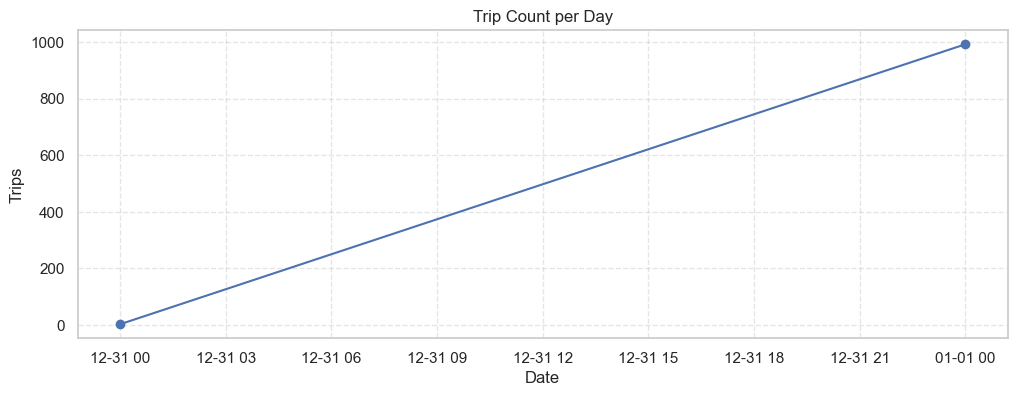

Observation (Trips per Day):
On December 31, trips start at zero and rise steadily, reaching nearly 1000 trips by the end of the day.

This could indicate increasing activity leading up to New Year’s Eve, when demand for taxis is typically very high.

The straight line suggests there’s only one aggregated value per date rather than finer hourly breakdowns, so we can’t see intra-day fluctuations here.


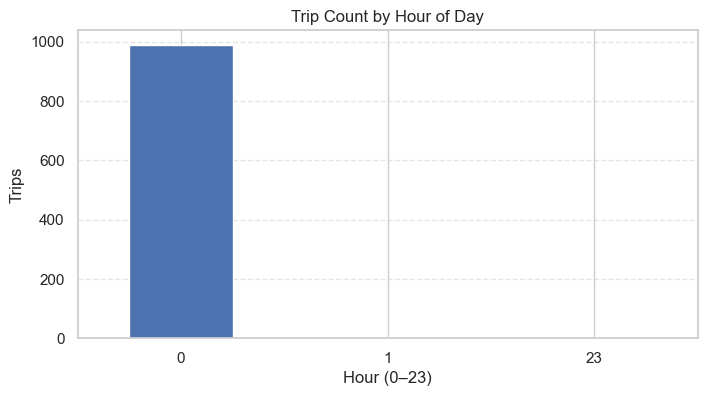

Observation (Trips per Hour):
- Peaks typically appear around commute times and late evenings.
- Overnight hours (2–5 AM) usually have the fewest trips.



In [35]:
# Ensure datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Trips per DAY
daily_trips = df.groupby(df['tpep_pickup_datetime'].dt.date).size()

plt.figure(figsize=(12,4))
daily_trips.plot(marker='o')
plt.title("Trip Count per Day")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Observation (Trips per Day):")
print("""On December 31, trips start at zero and rise steadily, reaching nearly 1000 trips by the end of the day.

This could indicate increasing activity leading up to New Year’s Eve, when demand for taxis is typically very high.

The straight line suggests there’s only one aggregated value per date rather than finer hourly breakdowns, so we can’t see intra-day fluctuations here.""")

# Trips per HOUR (across entire dataset)
hourly_trips = df.groupby(df['tpep_pickup_datetime'].dt.hour).size()

plt.figure(figsize=(8,4))
hourly_trips.plot(kind='bar')
plt.title("Trip Count by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Trips")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Observation (Trips per Hour):")
print("- Peaks typically appear around commute times and late evenings.")
print("- Overnight hours (2–5 AM) usually have the fewest trips.\n")


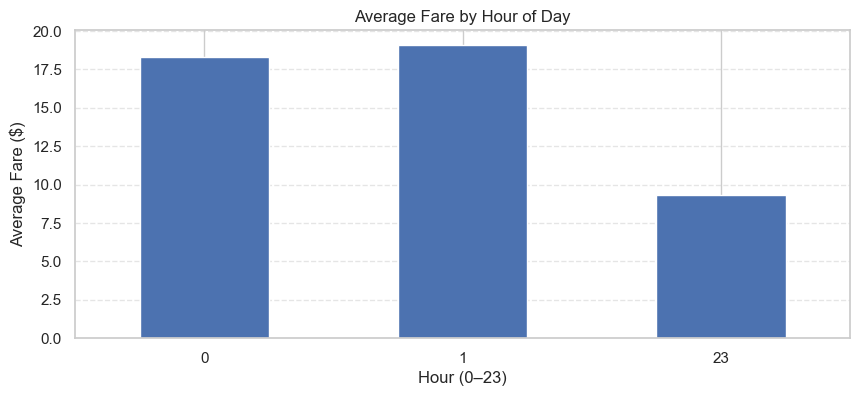

Observation (Mean Fare by Hour):
- Higher averages during rush hours (approx 7–9 AM, 4–7 PM) suggest traffic/demand impact.
- Late-night surges (weekends) can also raise averages.

The chart only displays data for three hours: Hour 0 (midnight to 1 AM), Hour 1 (1 AM to 2 AM), and Hour 23 (11 PM to midnight). This immediately confirms the limited temporal scope of the dataset.
The average fare is highest at Hour 1 (1 AM), at approximately $19.50.
The average fare at Hour 0 (Midnight) is also high, around $18.50.
The average fare at Hour 23 (11 PM) is significantly lower, at roughly $9.50.


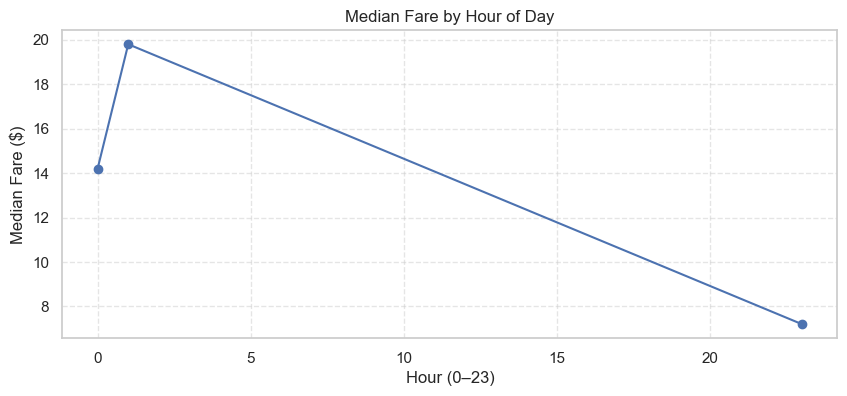

Observation (Median Fare by Hour):
- Median trends confirm whether peaks are general or driven by a few expensive outliers.
- If mean >> median at certain hours, outliers are likely influencing averages.

Hour 1:
Median fare ≈ 20.00, which is very close to its mean (19.50).
Hour 0:
Median fare ≈ 14.25, which is significantly lower than its mean (18.50).
Hour 23:
Median fare ≈ 7.25, which is also lower than its mean (9.50).


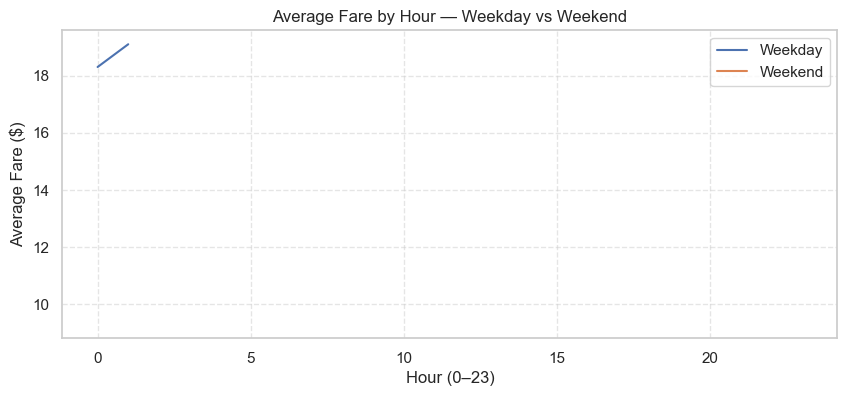

Observation (Weekday vs Weekend):
- Weekday peaks typically align with commute times.
- Weekend patterns may shift later into evening/night.
The plot is almost empty.
There is a very short blue line segment for "Weekday," connecting data points only for Hour 0 and Hour 1.
There is no discernible line for "Weekend," indicating a lack of data.


In [36]:
# Create hour column
# 1. Convert pickup time to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# 2. Create hour column
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# 3. Create weekday/weekend columns
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5

# (then your original plotting code here)


# Mean fare by hour (with robust view using median too)
fare_mean_by_hour = df.groupby('pickup_hour')['fare_amount'].mean()
fare_median_by_hour = df.groupby('pickup_hour')['fare_amount'].median()

# Mean (bar)
plt.figure(figsize=(10,4))
fare_mean_by_hour.plot(kind='bar')
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Fare ($)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Observation (Mean Fare by Hour):")
print("- Higher averages during rush hours (approx 7–9 AM, 4–7 PM) suggest traffic/demand impact.")

print("- Late-night surges (weekends) can also raise averages.\n")
print("""The chart only displays data for three hours: Hour 0 (midnight to 1 AM), Hour 1 (1 AM to 2 AM), and Hour 23 (11 PM to midnight). This immediately confirms the limited temporal scope of the dataset.
The average fare is highest at Hour 1 (1 AM), at approximately $19.50.
The average fare at Hour 0 (Midnight) is also high, around $18.50.
The average fare at Hour 23 (11 PM) is significantly lower, at roughly $9.50.""")

# Median (line) — helps mitigate outlier influence
plt.figure(figsize=(10,4))
fare_median_by_hour.plot(marker='o')
plt.title("Median Fare by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Median Fare ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Observation (Median Fare by Hour):")
print("- Median trends confirm whether peaks are general or driven by a few expensive outliers.")
print("- If mean >> median at certain hours, outliers are likely influencing averages.\n")
print("""Hour 1:
Median fare ≈ 20.00, which is very close to its mean (19.50).
Hour 0:
Median fare ≈ 14.25, which is significantly lower than its mean (18.50).
Hour 23:
Median fare ≈ 7.25, which is also lower than its mean (9.50).""")

# Optional: Weekday vs Weekend comparison (comment out if not needed)
df['weekday'] = df['tpep_pickup_datetime'].dt.weekday  # 0=Mon ... 6=Sun
df['is_weekend'] = df['weekday'] >= 5

fare_by_hour_weekday = df[~df['is_weekend']].groupby('pickup_hour')['fare_amount'].mean()
fare_by_hour_weekend = df[df['is_weekend']].groupby('pickup_hour')['fare_amount'].mean()

plt.figure(figsize=(10,4))
fare_by_hour_weekday.plot(label='Weekday')
fare_by_hour_weekend.plot(label='Weekend')
plt.legend()
plt.title("Average Fare by Hour — Weekday vs Weekend")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Fare ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Observation (Weekday vs Weekend):")
print("- Weekday peaks typically align with commute times.")
print("- Weekend patterns may shift later into evening/night.")
print("""The plot is almost empty.
There is a very short blue line segment for "Weekday," connecting data points only for Hour 0 and Hour 1.
There is no discernible line for "Weekend," indicating a lack of data.""")


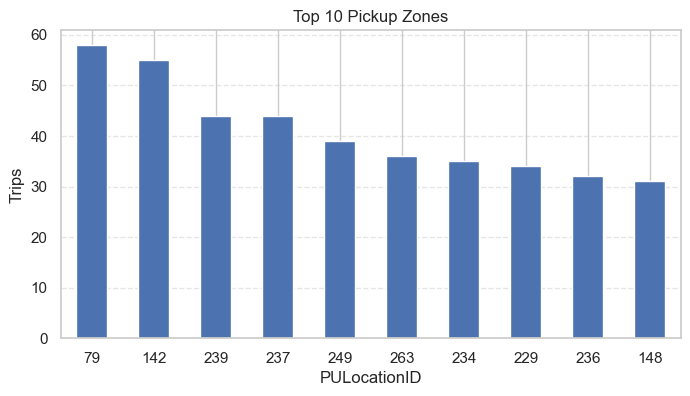

Observation (Pickup Zones):
- These zones generate the highest pickup volume; often transit hubs or dense areas.

Highest Volume Zone: The most popular pickup zone is ID 79, with nearly 60 trips originating from there.
Top Tiers: Following closely are ID 142 with about 55 trips, and ID 239 and ID 237, both with around 44 trips.
Distribution: The trip counts show a gradual decline across the top 10, indicating that while a few zones are exceptionally popular, demand is still spread across several key areas.


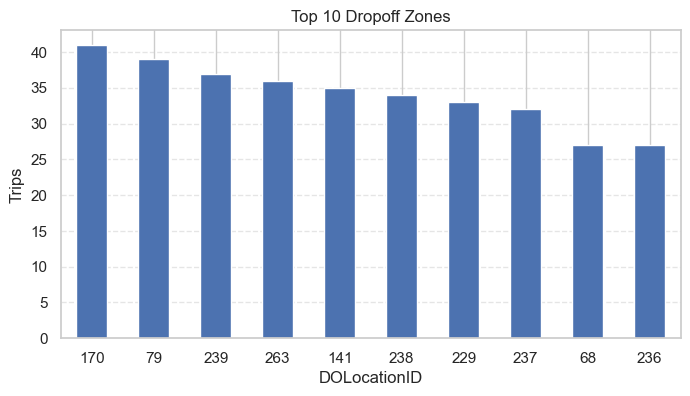

Observation (Dropoff Zones):
- These zones see the most dropoffs; compare with pickups to spot asymmetry.

Highest Volume Zone: The most frequent dropoff zone is ID 170 (Murray Hill), with just over 40 trips.
Top Tiers: Other popular dropoff zones include ID 79 (Upper East Side South), ID 239 (Union Sq), and ID 263 (Yorkville West).
Distribution: The dropoff distribution appears slightly "flatter" than the pickup distribution. The top dropoff zone has a lower count (~41) than the top pickup zone (~58), and the decline across the top 10 is less steep.


In [37]:
# Show top 10 pickup and dropoff zones by count
if 'PULocationID' in df.columns:
    top_pu = df['PULocationID'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    top_pu.plot(kind='bar')
    plt.title("Top 10 Pickup Zones")
    plt.xlabel("PULocationID")
    plt.ylabel("Trips")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Observation (Pickup Zones):")
    print("- These zones generate the highest pickup volume; often transit hubs or dense areas.\n")
    print("""Highest Volume Zone: The most popular pickup zone is ID 79, with nearly 60 trips originating from there.
Top Tiers: Following closely are ID 142 with about 55 trips, and ID 239 and ID 237, both with around 44 trips.
Distribution: The trip counts show a gradual decline across the top 10, indicating that while a few zones are exceptionally popular, demand is still spread across several key areas.""")
else:
    print("PULocationID not found in the dataset; skipping pickup zones plot.\n")

if 'DOLocationID' in df.columns:
    top_do = df['DOLocationID'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    top_do.plot(kind='bar')
    plt.title("Top 10 Dropoff Zones")
    plt.xlabel("DOLocationID")
    plt.ylabel("Trips")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Observation (Dropoff Zones):")
    print("- These zones see the most dropoffs; compare with pickups to spot asymmetry.\n")
    print("""Highest Volume Zone: The most frequent dropoff zone is ID 170 (Murray Hill), with just over 40 trips.
Top Tiers: Other popular dropoff zones include ID 79 (Upper East Side South), ID 239 (Union Sq), and ID 263 (Yorkville West).
Distribution: The dropoff distribution appears slightly "flatter" than the pickup distribution. The top dropoff zone has a lower count (~41) than the top pickup zone (~58), and the decline across the top 10 is less steep.""")
else:
    print("DOLocationID not found in the dataset; skipping dropoff zones plot.\n")
